In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('housing.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.dropna(inplace=True)

In [ ]:
x=df.drop('median_house_value',axis=1)

In [ ]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [ ]:
y=df['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2844,-118.98,35.41,36.0,1482.0,266.0,640.0,274.0,3.8750,INLAND
4483,-118.19,34.06,47.0,2324.0,658.0,3020.0,594.0,1.1868,<1H OCEAN
11489,-118.01,33.70,24.0,3856.0,567.0,1741.0,588.0,7.2480,<1H OCEAN
18990,-121.99,38.48,17.0,1824.0,348.0,934.0,305.0,4.6719,INLAND
4185,-118.23,34.13,34.0,609.0,149.0,407.0,145.0,4.5766,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50.0,2195.0,336.0,878.0,309.0,6.8840,<1H OCEAN
8093,-118.21,33.82,45.0,455.0,92.0,394.0,89.0,4.9562,NEAR OCEAN
17914,-121.99,37.36,32.0,1754.0,324.0,917.0,330.0,4.6761,<1H OCEAN
18103,-122.04,37.30,25.0,2366.0,417.0,1076.0,398.0,6.9238,<1H OCEAN


In [ ]:
data=x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

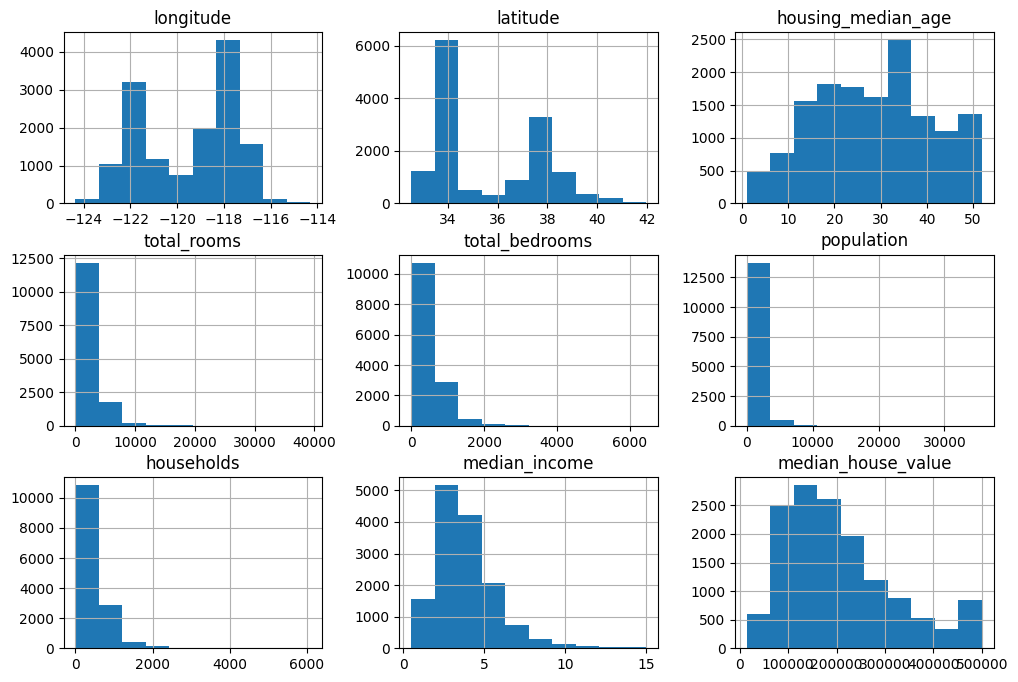

In [ ]:
data.hist(figsize=(12,8))

In [ ]:
non_numeric = data.select_dtypes(exclude=np.number)

In [ ]:
data_numeric = data.drop(columns=non_numeric)

<Axes: >

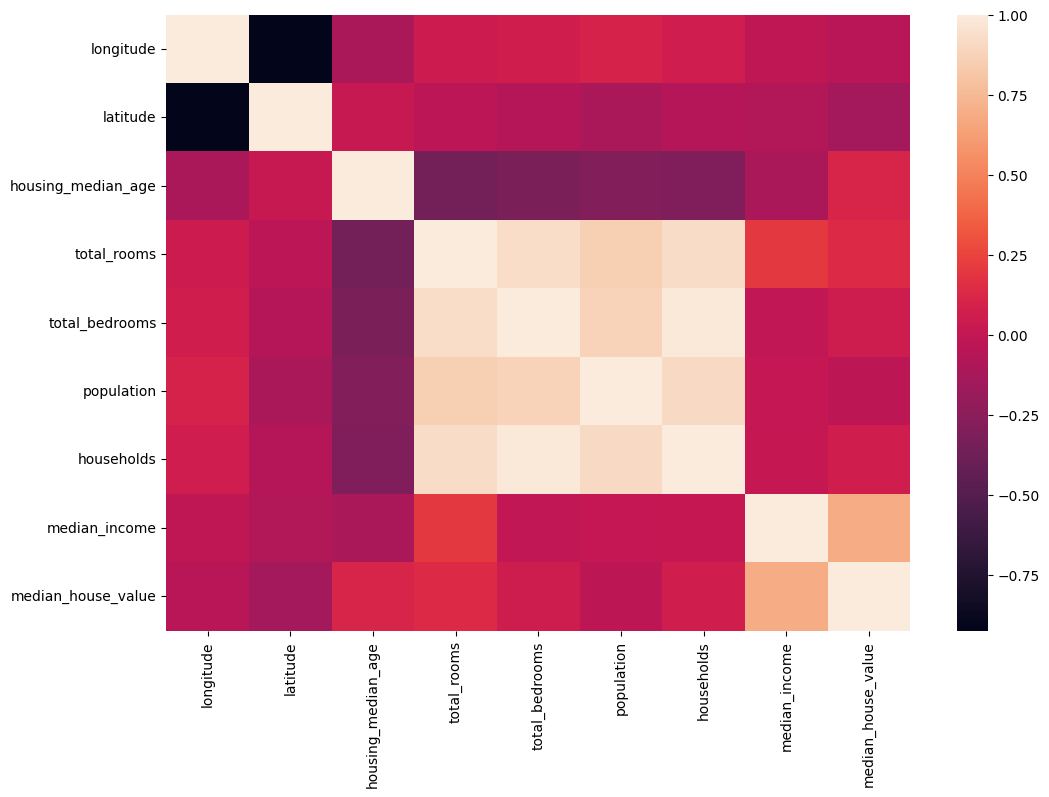

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_numeric.corr())

In [ ]:
non_numeric

,ocean_proximity
2844,INLAND
4483,<1H OCEAN
11489,<1H OCEAN
18990,INLAND
4185,<1H OCEAN
...,...
5757,<1H OCEAN
8093,NEAR OCEAN
17914,<1H OCEAN
18103,<1H OCEAN


In [ ]:
df1=pd.get_dummies(df['ocean_proximity'])

In [ ]:
data=data.join(df1)

In [ ]:
data.drop(columns='ocean_proximity',inplace=True)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2844,-118.98,35.41,36.0,1482.0,266.0,640.0,274.0,3.8750,94500.0,False,True,False,False,False
4483,-118.19,34.06,47.0,2324.0,658.0,3020.0,594.0,1.1868,93800.0,True,False,False,False,False
11489,-118.01,33.70,24.0,3856.0,567.0,1741.0,588.0,7.2480,302700.0,True,False,False,False,False
18990,-121.99,38.48,17.0,1824.0,348.0,934.0,305.0,4.6719,250000.0,False,True,False,False,False
4185,-118.23,34.13,34.0,609.0,149.0,407.0,145.0,4.5766,185800.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50.0,2195.0,336.0,878.0,309.0,6.8840,365600.0,True,False,False,False,False
8093,-118.21,33.82,45.0,455.0,92.0,394.0,89.0,4.9562,165700.0,False,False,False,False,True
17914,-121.99,37.36,32.0,1754.0,324.0,917.0,330.0,4.6761,298300.0,True,False,False,False,False
18103,-122.04,37.30,25.0,2366.0,417.0,1076.0,398.0,6.9238,345900.0,True,False,False,False,False


<Axes: >

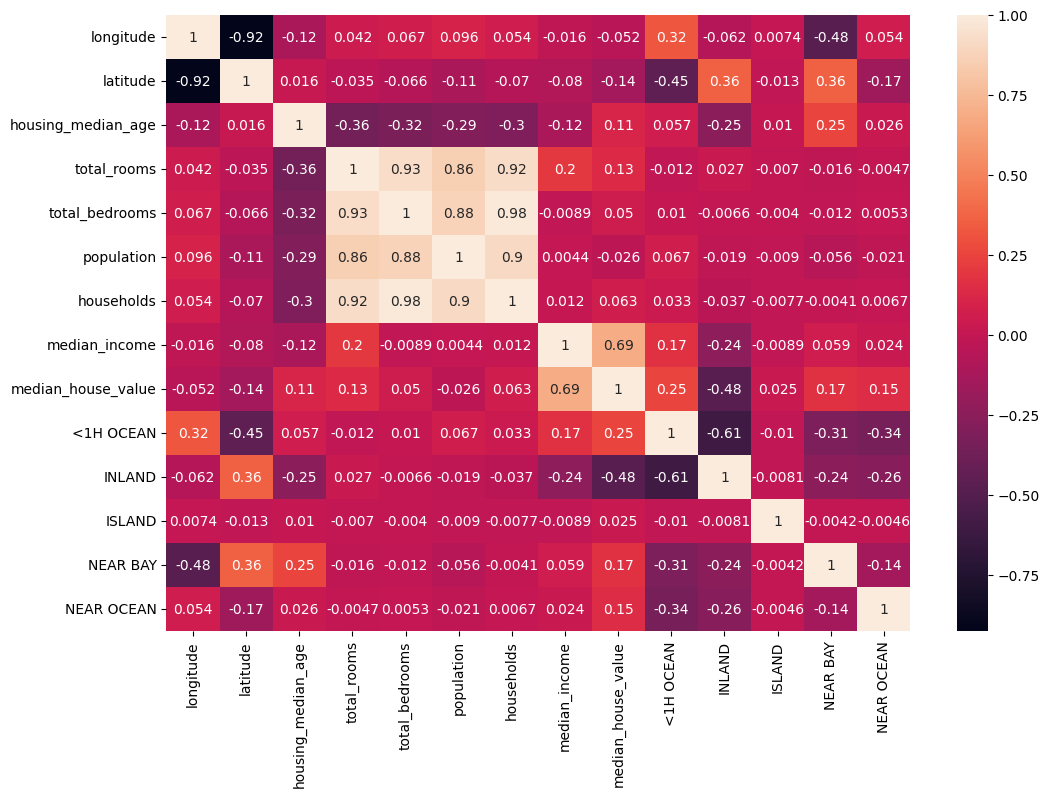

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2844,-118.98,35.41,36.0,1482.0,266.0,640.0,274.0,3.8750,94500.0,False,True,False,False,False
4483,-118.19,34.06,47.0,2324.0,658.0,3020.0,594.0,1.1868,93800.0,True,False,False,False,False
11489,-118.01,33.70,24.0,3856.0,567.0,1741.0,588.0,7.2480,302700.0,True,False,False,False,False
18990,-121.99,38.48,17.0,1824.0,348.0,934.0,305.0,4.6719,250000.0,False,True,False,False,False
4185,-118.23,34.13,34.0,609.0,149.0,407.0,145.0,4.5766,185800.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50.0,2195.0,336.0,878.0,309.0,6.8840,365600.0,True,False,False,False,False
8093,-118.21,33.82,45.0,455.0,92.0,394.0,89.0,4.9562,165700.0,False,False,False,False,True
17914,-121.99,37.36,32.0,1754.0,324.0,917.0,330.0,4.6761,298300.0,True,False,False,False,False
18103,-122.04,37.30,25.0,2366.0,417.0,1076.0,398.0,6.9238,345900.0,True,False,False,False,False


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
l=LinearRegression()

In [ ]:
x=data_numeric.drop('median_house_value',axis=1)
y=data_numeric['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
l.fit(x_train,y_train)

LinearRegression()

In [ ]:
l.score(x_test,y_test)

0.6419173847247952

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train_s=StandardScaler().fit_transform(x_train)
x_test_s=StandardScaler().fit_transform(x_test)

In [ ]:
l.fit(x_train_s,y_train)

LinearRegression()

In [ ]:
l.score(x_test_s,y_test)

0.6415258644771067

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
f=RandomForestRegressor()

In [ ]:
f.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
f.score(x_test,y_test)

0.803387146492527